<h3 style="color: Red; text-align:center;">Libraries</h3>

In [3]:
!pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 28.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=b2b2fe56dea22d7f5b6386beaa743d56b3bc7c284a1b1c3f574ff543981239c9
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

%matplotlib inline

<h3 style="color: Red; text-align:center;">Define Variables</h3>

In [5]:
# inputs (ctrl.Antecedent)
healthy_cells = ctrl.Antecedent(np.arange(0, 1, 0.01), 'healthy_cells')
cancer_cells = ctrl.Antecedent(np.arange(0, 1, 0.01), 'cancer_cells')

# output (ctrl.Consequent)
Drug_dose = ctrl.Consequent(np.arange(4, 10, 0.1), 'Drug_dose', defuzzify_method='mom')

<h3 style="color: Red; text-align:center;">Define Membership Functions</h3>

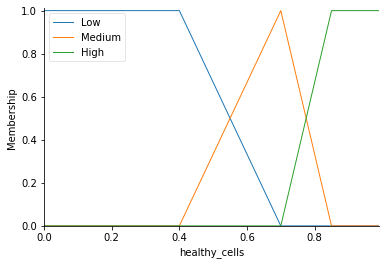

In [6]:
# healthy cells 
healthy_cells['Low'] = fuzz.trapmf(healthy_cells.universe, [0, 0, 0.4, 0.7])
healthy_cells['Medium'] = fuzz.trimf(healthy_cells.universe, [0.4, 0.7, 0.85])
healthy_cells['High'] = fuzz.trapmf(healthy_cells.universe, [0.7, 0.85, 1, 1])

# View the membership function
healthy_cells.view()

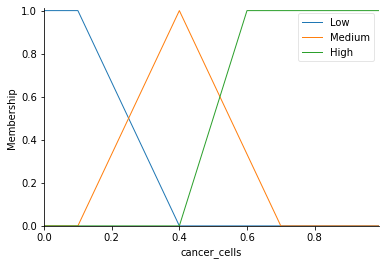

In [7]:
# cancer cells 
cancer_cells['Low'] = fuzz.trapmf(cancer_cells.universe, [0, 0, 0.1, 0.4])
cancer_cells['Medium'] = fuzz.trimf(cancer_cells.universe, [0.1, 0.4, 0.7])
cancer_cells['High'] = fuzz.trapmf(cancer_cells.universe, [0.4, 0.6, 1, 1])

# View the membership function
cancer_cells.view()

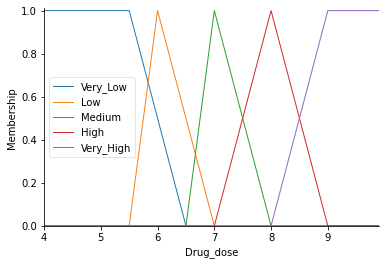

In [8]:
# Drug Dose
Drug_dose['Very_Low'] = fuzz.trapmf(Drug_dose.universe, [0, 0, 5.5, 6.5])
Drug_dose['Low'] = fuzz.trimf(Drug_dose.universe, [5.5, 6.0, 7.0])
Drug_dose['Medium'] = fuzz.trimf(Drug_dose.universe, [6.5, 7.0, 8.0])
Drug_dose['High'] = fuzz.trimf(Drug_dose.universe, [7.0, 8.0, 9.0])
Drug_dose['Very_High'] = fuzz.trapmf(Drug_dose.universe, [8.0, 9.0, 10, 10])

# View the membership function
Drug_dose.view()

<h3 style="color: Red; text-align:center;">Define Rules</h3>

In [9]:
rule1 = ctrl.Rule(healthy_cells['Low']    & cancer_cells['Low'],    Drug_dose['Low'])
rule2 = ctrl.Rule(healthy_cells['Low']    & cancer_cells['Medium'], Drug_dose['Medium'])
rule3 = ctrl.Rule(healthy_cells['Low']    & cancer_cells['High'],   Drug_dose['Very_High'])
rule4 = ctrl.Rule(healthy_cells['Medium'] & cancer_cells['Low'],    Drug_dose['Low'])
rule5 = ctrl.Rule(healthy_cells['Medium'] & cancer_cells['Medium'], Drug_dose['Medium'])
rule6 = ctrl.Rule(healthy_cells['Medium'] & cancer_cells['High'],   Drug_dose['High'])
rule7 = ctrl.Rule(healthy_cells['High']   & cancer_cells['Low'],    Drug_dose['Very_Low'])
rule8 = ctrl.Rule(healthy_cells['High']   & cancer_cells['Medium'], Drug_dose['Low'])
rule9 = ctrl.Rule(healthy_cells['High']   & cancer_cells['High'],   Drug_dose['Medium'])

<h3 style="color: Red; text-align:center;">Showing Rules</h3>

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc8ed6bc100>)

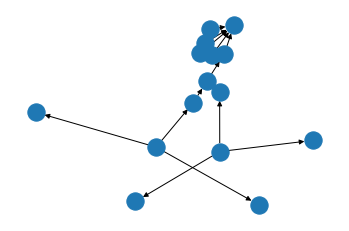

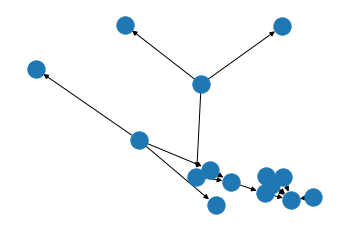

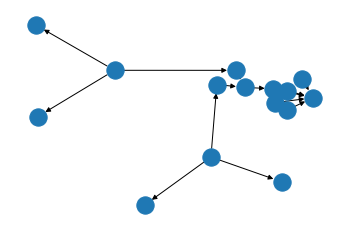

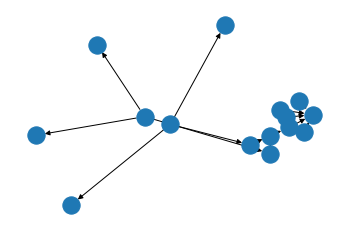

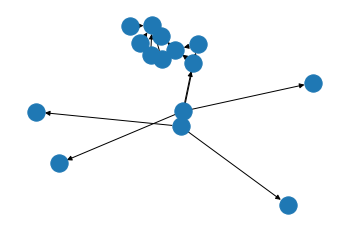

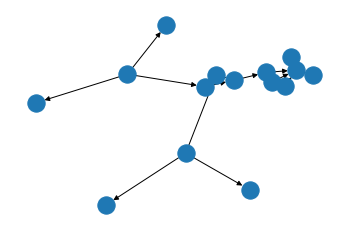

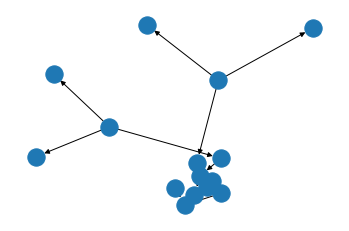

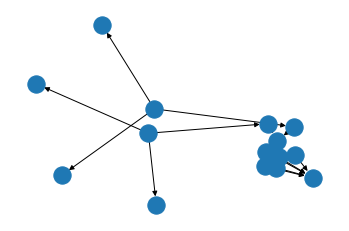

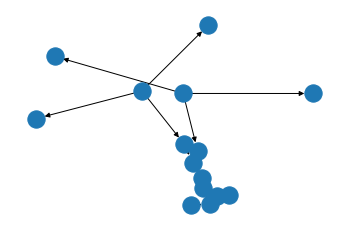

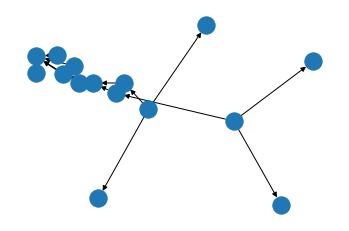

In [10]:
rules_list = [rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9]

def showing_rules():

    for rules in rules_list:
        rules.view()
        
    return rules.view()
    
showing_rules()

In [11]:
Dose_Ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])

<h3 style="color: Red; text-align:center;">Create a Controler</h3>

In [ ]:
Dose_controller = ctrl.ControlSystemSimulation(Dose_Ctrl)

<h3 style="color: Red; text-align:center;">Check Output for different inputs</h3>

Drug Dose: 0.0071388888888888795


C:\Tools\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


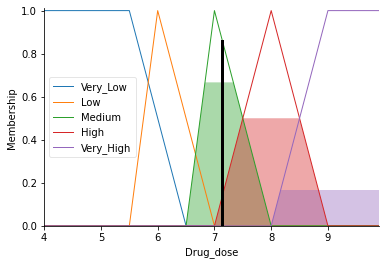

In [ ]:
# run inputs:
Dose_controller.input['healthy_cells'] = 0.65
Dose_controller.input['cancer_cells'] = 0.5

Dose_controller.compute()

print('Drug Dose: {}'.format(Dose_controller.output['Drug_dose'] / 1000))

Drug_dose.view(sim=Dose_controller)

Drug Dose: 0.009299999999999982


C:\Tools\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


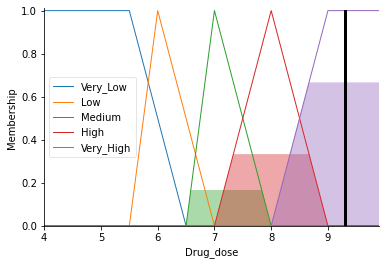

In [ ]:
# run inputs:
Dose_controller.input['healthy_cells'] = 0.5
Dose_controller.input['cancer_cells'] = 0.65

Dose_controller.compute()

print('Drug Dose: {}'.format(Dose_controller.output['Drug_dose'] / 1000))

Drug_dose.view(sim=Dose_controller)